clone repo từ github về + change dir vào chỗ file wines.csv

In [ ]:
!git clone https://github.com/blackfox20092006/SP26-AI1904-DAP391m/

Cloning into 'SP26-AI1904-DAP391m'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 29 (delta 3), reused 21 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 148.15 KiB | 5.70 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
%cd SP26-AI1904-DAP391m/data

/content/SP26-AI1904-DAP391m/data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

đọc file csv + xem structure của dataframe + chuẩn hóa về range [0, 1] để model dễ hội tụ, đỡ bị bias hơn

In [ ]:
a = pd.read_csv('wines.csv')
a.head()
for i in a.keys():
  print(i,min(a[i]),max(a[i]))

fixed_acidity 3.8 15.9
volatile_acidity 0.08 1.58
citric_acid 0.0 1.66
residual_sugar 0.6 65.8
chlorides 0.009 0.611
free_sulfur_dioxide 1.0 289.0
total_sulfur_dioxide 6.0 440.0
density 0.98711 1.03898
pH 2.72 4.01
sulphates 0.22 2.0
alcohol 8.0 14.9
type red white
quality 3 9


In [ ]:
for i in a.keys():
  if i != 'type':
    a[i] = (a[i] - min(a[i])) / (max(a[i]) - min(a[i]))
a.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,red,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,red,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,red,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,red,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,red,0.333333


chia train test theo tỉ lệ 80%, 20%

In [ ]:
x = a[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = a['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

tạo model linear regression dự đoán quanlity dựa vào các biến còn lại

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
output = model.predict(x_test)


model có khả năng giải thích mức độ biến thiên của dữ liệu ở mức trung bình thấp với R2 đạt khoảng 31,6% và các trọng số cho thấy sự ảnh hưởng không đồng nhất của các đặc trưng đầu vào lên kết quả dự báo

In [ ]:
r2 = r2_score(y_test, output)
mae = mean_absolute_error(y_test, output)
mse = mean_squared_error(y_test, output)
print(model.coef_)
print(model.intercept_)
print(r2)
print(mae)
print(mse)

[ 0.13610802 -0.31899224 -0.0276672   0.49768855 -0.0643527   0.26056251
 -0.17450901 -0.50315945  0.08846598  0.24788132  0.29810104]
0.36590126537748174
0.31622850145006376
0.09495462243038841
0.01501657291467825


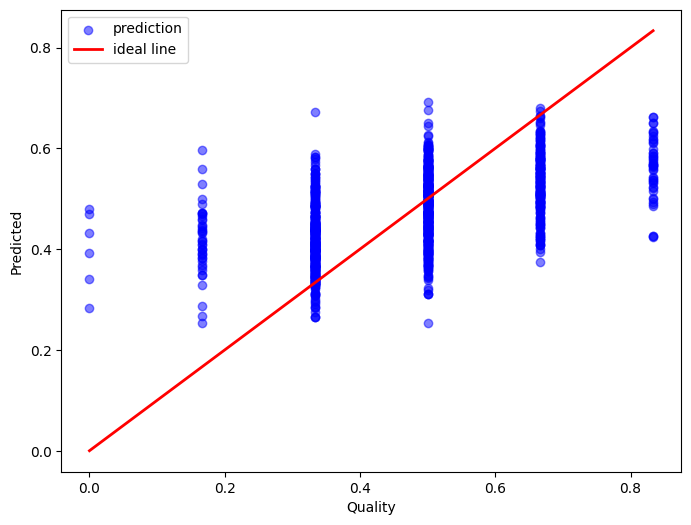

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, output, color='blue', alpha=0.5, label='prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='ideal line')
plt.xlabel('Quality')
plt.ylabel('Predicted')
plt.legend()
plt.show()

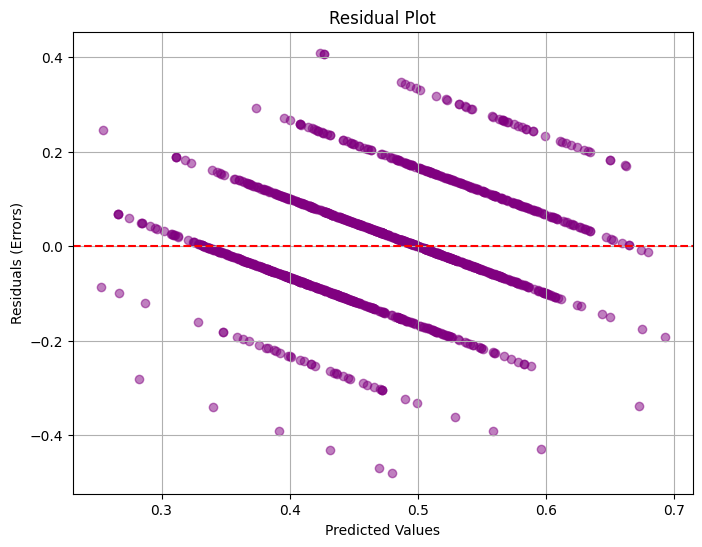

In [ ]:
residuals = y_test - output
plt.figure(figsize=(8, 6))
plt.scatter(output, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

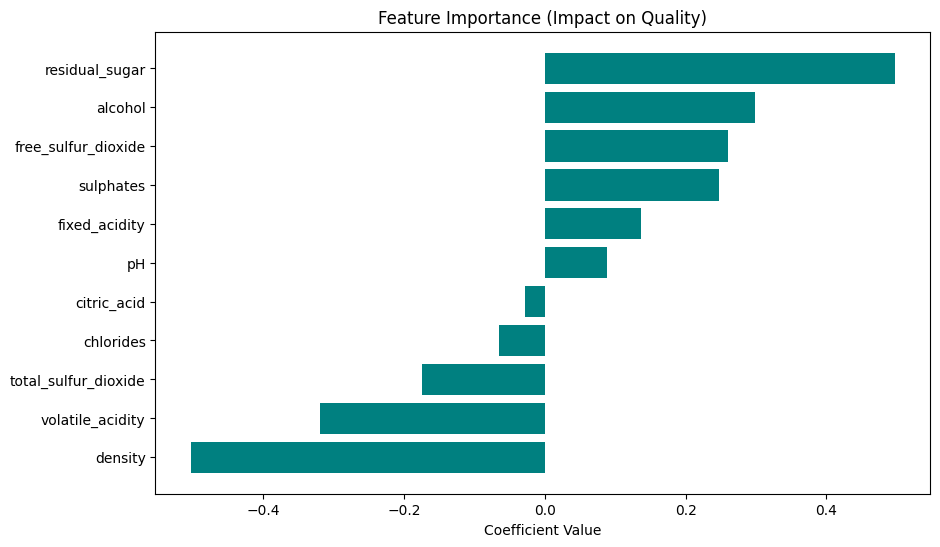

In [ ]:
features = x.columns
coefs = model.coef_
sorted_idx = np.argsort(coefs)
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], coefs[sorted_idx], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Impact on Quality)')
plt.show()